HW_4 by 21600055 김동규

exercise 2

1. Objective: Template matching with MNIST data

2. Input: mnist.pkl file

3. Output: template images and number of matches and accuracy

In [75]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open("./data/mnist.pkl","rb") as f:
    train_set, valid_set, test_set = pickle.load(f,encoding="latin1") # load mnist file
    
train_x, train_y = train_set # return each number's pixel brightness array and label array as tuple
test_x, test_y = test_set

train_x = pd.DataFrame(train_x) # make pixel brightness to data frame
train_y = pd.DataFrame(train_y, columns = ['label']) # make label array to dataframe
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns = ["label"])

train_data = pd.concat([train_x,train_y],axis = 1) # concatenate label to x
test_data = pd.concat([test_x,test_y],axis = 1)

train_zero = (train_data.label == 0) # slice mask with number zero
train_one = (train_data.label == 1) # slice mask with number one
test_zero = (test_data.label == 0)
test_one = (test_data.label == 1)

In [76]:
def convert(temp): # convert grayscale to binary function
    temp = np.array([np.array([1 if pix!=0 else 0 for pix in temp.iloc[i, :]]) for i in range(len(temp))])
    temp = pd.DataFrame(temp)
    return temp

In [77]:
train_data[train_zero].head() # train data only 0

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [78]:
zero = train_data[train_zero].head(1) # pick zero representative
zero = convert(zero) # convert binary
zero # 784th column is label

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


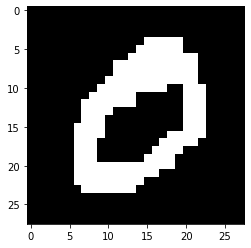

In [79]:
zero_image = zero.iloc[0,:-1] # all columns except label
pixels = zero_image.values.reshape((28,28)) # reshape each image to 28 X 28 size
plt.imshow(pixels,cmap = "gray") # image show in grayscale

In [80]:
train_data[train_one].head() # train data only 1

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [81]:
one = train_data[train_one].head(1) # pick one representative
one = convert(one) #convert binary
one # 784th columns is label

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


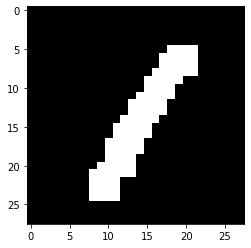

In [82]:
one_image = one.iloc[0,:-1]
pixels = one_image.values.reshape((28,28)) # reshape each image to 28 X 28 size
plt.imshow(pixels,cmap = "gray") # image show in grayscale

In [83]:
test_data = test_data[test_zero | test_one] # test data with 0 and 1 label
test_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Num of 1s after AND with 0-label train data:  36
Num of 1s after AND with 1-label train data:  47
1-label yields larger number, thus 1th test image is classfied as 1 digit


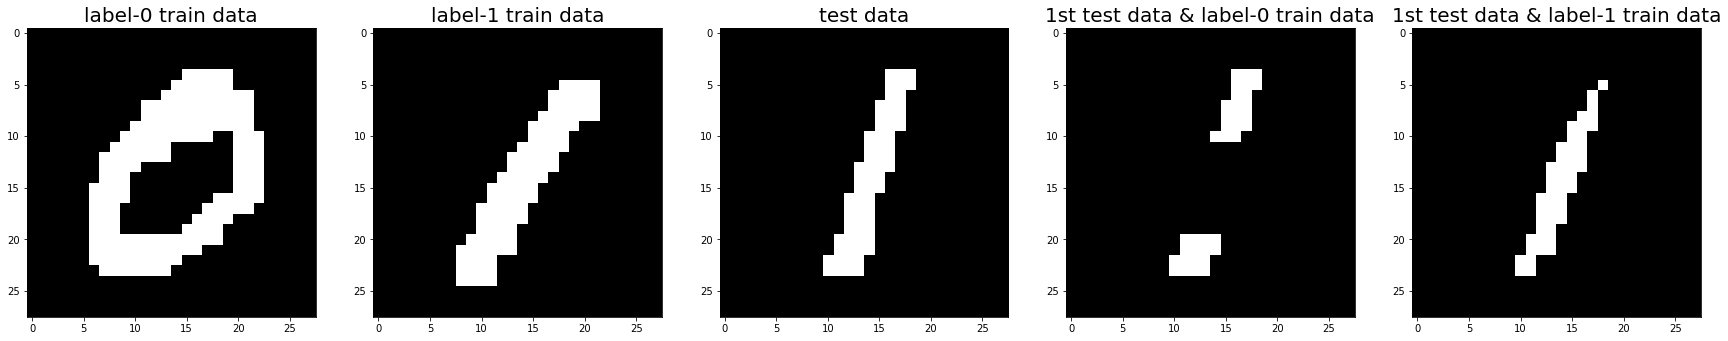

In [84]:
test_data = convert(test_data) # convert grayscale to binary
 
match_zero = test_data.iloc[0,:-1].mul(zero.iloc[0,:-1]) # because it is binary, has only 0 or 1. if mul two image, then it can be AND operation
match_one = test_data.iloc[0,:-1].mul(one.iloc[0,:-1]) # :-1 means all columns except label
ct_zero = match_zero.sum() # sum 1 value of template match test and zero
ct_one = match_one.sum() # sum 1 value of template match test and one

plt.figure(figsize=[30,10])
plt.subplot(1,5,1)
zero_image = zero.iloc[0,:-1]
pixels = zero_image.values.reshape((28,28)) # reshape each image to 28 X 28 size
plt.imshow(pixels,cmap = "gray") # image show in grayscale
plt.title("label-0 train data",fontsize=20)

plt.subplot(1,5,2)
one_image = one.iloc[0,:-1]
pixels = one_image.values.reshape((28,28)) # reshape each image to 28 X 28 size
plt.imshow(pixels,cmap = "gray") # image show in grayscale
plt.title("label-1 train data",fontsize=20)

plt.subplot(1,5,3)
pixels = test_data.iloc[0,:-1].values.reshape((28,28))
plt.imshow(pixels,cmap = "gray")
plt.title("test data",fontsize = 20)

plt.subplot(1,5,4)
pixels = match_zero.values.reshape((28,28))
plt.imshow(pixels,cmap="gray")
plt.title("1st test data & label-0 train data",fontsize = 20)

plt.subplot(1,5,5)
pixels = match_one.values.reshape((28,28))
plt.imshow(pixels,cmap="gray")
plt.title("1st test data & label-1 train data",fontsize = 20)

print("Num of 1s after AND with 0-label train data: ",ct_zero)
print("Num of 1s after AND with 1-label train data: ",ct_one)
if ct_zero > ct_one:
    print("0-label yields larger number, thus 1th test image is classfied as 0 digit")
else:
    print("1-label yields larger number, thus 1th test image is classfied as 1 digit")

In [85]:
correct = 0

for i,row in test_data.iterrows(): # loop test_data which has 0 or 1 image
    match_zero = test_data.iloc[i,:-1].mul(zero.iloc[0,:-1]) # because it is binary, has only 0 or 1. if mul two image, then it can be AND operation
    match_one = test_data.iloc[i,:-1].mul(one.iloc[0,:-1]) # :-1 means all columns except label
    ct_zero = match_zero.sum() # sum 1 value of template match test and zero
    ct_one = match_one.sum() # sum 1 value of template match test and one
    
    if ct_zero > ct_one and test_data.iloc[i,-1] == 0: # if count_zero is bigger and label is 0 then correct
        correct += 1
    elif ct_zero < ct_one and test_data.iloc[i,-1] == 1: # if count_one is bigger and label is 1 then correct
        correct += 1

print("Total accuracy on Test data is ",correct / len(test_data)) # compute accuracy len(test_data) is row count 2115

Total accuracy on Test data is  0.7933806146572104
